CODE BLOCK: 1

In [1]:
import sys
#Check the working mode
'google.colab' in sys.modules

True

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import sys
if 'google.colab' in sys.modules:
# Add the directory containing your module to the Python path
  module_path = '/content/drive/MyDrive/Colab_Notebooks/Session6'
  sys.path.append(module_path)
  print(sys.path)

['/content', '/env/python', '/usr/lib/python310.zip', '/usr/lib/python3.10', '/usr/lib/python3.10/lib-dynload', '', '/usr/local/lib/python3.10/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.10/dist-packages/IPython/extensions', '/root/.ipython', '/content/drive/MyDrive/Colab_Notebooks/Session6']


In [4]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import os
#os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [5]:
# if 'google.colab' in sys.modules:
#     # Download the repo from GitHub
#     print("Downloading repository on Colab...")
#     !git clone https://github.com/Shivdutta/ERA2-Session6.git

#     # Import files from the downloaded repository
#     #sys.path.insert(0,'./ERA/Session/')

CODE BLOCK: 2

In [6]:
# Check if GPU is available
# Set device as GPU if available else CPU
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

CUDA Available? True


In [7]:
# %run /content/drive/MyDrive/Colab_Notebooks/Session6/utils.py
# %run /content/drive/MyDrive/Colab_Notebooks/Session6/dataset.py
# %run /content/drive/MyDrive/Colab_Notebooks/Session6/model.py

CODE BLOCK: 3

In [8]:
from model import Session6_Model_old as Net
#dropout_prob=0.069

In [9]:
# Train data transformations
train_transforms = transforms.Compose([
    transforms.RandomApply([transforms.CenterCrop(22), ], p=0.1),
    transforms.Resize((28, 28)),
    transforms.RandomRotation((-15., 15.), fill=0),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
    ])

# Test data transformations
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1325,), (0.3104,))
    ])

CODE BLOCK: 4 & 5 merged

In [10]:
from dataset import get_train_loader, get_test_loader
dir(get_train_loader)
#torch.manual_seed(1)

#kwargs = {'batch_size': 256, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}
kwargs = {'batch_size': 128, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}
print(kwargs)

train_loader = get_train_loader(**kwargs)
test_loader = get_test_loader(**kwargs)

{'batch_size': 128, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}


CODE BLOCK: 6

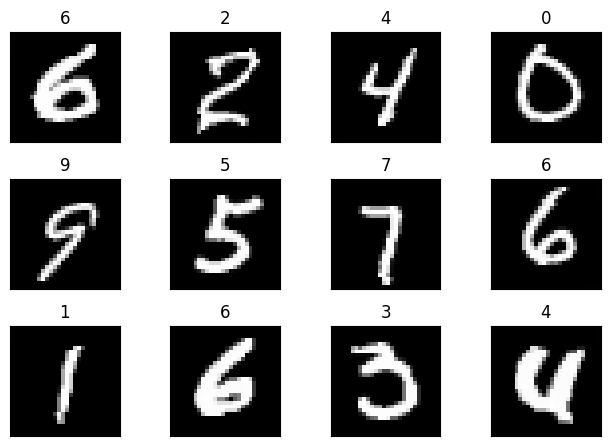

In [11]:
import matplotlib.pyplot as plt

batch_data, batch_label = next(iter(train_loader))

fig = plt.figure()

for i in range(12):
  plt.subplot(3,4,i+1)
  plt.tight_layout()
  plt.imshow(batch_data[i].squeeze(0), cmap='gray')
  plt.title(batch_label[i].item())
  plt.xticks([])
  plt.yticks([])

CODE BLOCK: 7

In [12]:
from utils import plot_accuracy, get_summary
dropout_prob = 0.01
get_summary(Net(dropout_prob), (1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 4, 28, 28]              36
              ReLU-2            [-1, 4, 28, 28]               0
       BatchNorm2d-3            [-1, 4, 28, 28]               8
            Conv2d-4            [-1, 4, 28, 28]             144
              ReLU-5            [-1, 4, 28, 28]               0
       BatchNorm2d-6            [-1, 4, 28, 28]               8
            Conv2d-7            [-1, 4, 28, 28]             144
              ReLU-8            [-1, 4, 28, 28]               0
       BatchNorm2d-9            [-1, 4, 28, 28]               8
        Dropout2d-10            [-1, 4, 28, 28]               0
        MaxPool2d-11            [-1, 4, 14, 14]               0
           Conv2d-12            [-1, 8, 14, 14]             288
             ReLU-13            [-1, 8, 14, 14]               0
      BatchNorm2d-14            [-1, 8,

CODE BLOCK: 8

In [13]:
# Data to plot accuracy and loss graphs
train_losses = []
test_losses = []
train_acc = []
test_acc = []

test_incorrect_pred = {'images': [], 'ground_truths': [], 'predicted_vals': []}

CODE BLOCK: 9

In [14]:
from utils import train_model, test_model

CODE BLOCK: 10

In [20]:
from torch.optim.lr_scheduler import StepLR

# model =  Net(dropout_prob=0.069).to(device)
# optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
model = Net(dropout_prob=dropout_prob).to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
#optimizer = optim.SGD(model.parameters(), lr=0.02, momentum=0.9)
scheduler = StepLR(optimizer, step_size=15, gamma=0.1)

for epoch in range(1, 20):
    print('Currently Executing Epoch:', epoch)
    train_losses, train_acc = train_model(model, device, train_loader, optimizer, epoch,train_losses, train_acc)
    test_losses, test_acc = test_model(model, device, test_loader,test_losses, test_acc)
    scheduler.step()

Currently Executing Epoch: 1


Loss=0.13996659219264984 Batch_id=468 Accuracy=87.95: 100%|██████████| 469/469 [00:11<00:00, 41.17it/s]



Test set: Average loss: 0.0686, Accuracy: 9784/10000 (97.84%)

Currently Executing Epoch: 2


Loss=0.07255340367555618 Batch_id=468 Accuracy=97.64: 100%|██████████| 469/469 [00:11<00:00, 40.16it/s]



Test set: Average loss: 0.0533, Accuracy: 9838/10000 (98.38%)

Currently Executing Epoch: 3


Loss=0.020857753232121468 Batch_id=468 Accuracy=98.24: 100%|██████████| 469/469 [00:11<00:00, 40.65it/s]



Test set: Average loss: 0.0377, Accuracy: 9873/10000 (98.73%)

Currently Executing Epoch: 4


Loss=0.02174842357635498 Batch_id=468 Accuracy=98.53: 100%|██████████| 469/469 [00:11<00:00, 40.20it/s]



Test set: Average loss: 0.0317, Accuracy: 9892/10000 (98.92%)

Currently Executing Epoch: 5


Loss=0.02022217959165573 Batch_id=468 Accuracy=98.77: 100%|██████████| 469/469 [00:11<00:00, 40.48it/s]



Test set: Average loss: 0.0320, Accuracy: 9900/10000 (99.00%)

Currently Executing Epoch: 6


Loss=0.0736260637640953 Batch_id=468 Accuracy=98.92: 100%|██████████| 469/469 [00:11<00:00, 40.31it/s]



Test set: Average loss: 0.0295, Accuracy: 9897/10000 (98.97%)

Currently Executing Epoch: 7


Loss=0.04806552827358246 Batch_id=468 Accuracy=99.02: 100%|██████████| 469/469 [00:11<00:00, 39.53it/s]



Test set: Average loss: 0.0268, Accuracy: 9915/10000 (99.15%)

Currently Executing Epoch: 8


Loss=0.013765481300652027 Batch_id=468 Accuracy=99.08: 100%|██████████| 469/469 [00:11<00:00, 39.95it/s]



Test set: Average loss: 0.0269, Accuracy: 9925/10000 (99.25%)

Currently Executing Epoch: 9


Loss=0.022269509732723236 Batch_id=468 Accuracy=99.09: 100%|██████████| 469/469 [00:11<00:00, 39.91it/s]



Test set: Average loss: 0.0301, Accuracy: 9904/10000 (99.04%)

Currently Executing Epoch: 10


Loss=0.03125382959842682 Batch_id=468 Accuracy=99.15: 100%|██████████| 469/469 [00:11<00:00, 40.63it/s]



Test set: Average loss: 0.0268, Accuracy: 9918/10000 (99.18%)

Currently Executing Epoch: 11


Loss=0.01220733392983675 Batch_id=468 Accuracy=99.22: 100%|██████████| 469/469 [00:11<00:00, 39.76it/s]



Test set: Average loss: 0.0253, Accuracy: 9921/10000 (99.21%)

Currently Executing Epoch: 12


Loss=0.02853059209883213 Batch_id=468 Accuracy=99.20: 100%|██████████| 469/469 [00:12<00:00, 38.97it/s]



Test set: Average loss: 0.0223, Accuracy: 9916/10000 (99.16%)

Currently Executing Epoch: 13


Loss=0.004551796242594719 Batch_id=468 Accuracy=99.29: 100%|██████████| 469/469 [00:11<00:00, 40.06it/s]



Test set: Average loss: 0.0220, Accuracy: 9925/10000 (99.25%)

Currently Executing Epoch: 14


Loss=0.008316882885992527 Batch_id=468 Accuracy=99.32: 100%|██████████| 469/469 [00:11<00:00, 39.58it/s]



Test set: Average loss: 0.0219, Accuracy: 9932/10000 (99.32%)

Currently Executing Epoch: 15


Loss=0.008117679506540298 Batch_id=468 Accuracy=99.31: 100%|██████████| 469/469 [00:11<00:00, 39.38it/s]



Test set: Average loss: 0.0251, Accuracy: 9920/10000 (99.20%)

Currently Executing Epoch: 16


Loss=0.016682356595993042 Batch_id=468 Accuracy=99.52: 100%|██████████| 469/469 [00:11<00:00, 40.27it/s]



Test set: Average loss: 0.0199, Accuracy: 9938/10000 (99.38%)

Currently Executing Epoch: 17


Loss=0.02587145008146763 Batch_id=468 Accuracy=99.61: 100%|██████████| 469/469 [00:11<00:00, 39.86it/s]



Test set: Average loss: 0.0191, Accuracy: 9939/10000 (99.39%)

Currently Executing Epoch: 18


Loss=0.0013698586262762547 Batch_id=468 Accuracy=99.65: 100%|██████████| 469/469 [00:11<00:00, 40.38it/s]



Test set: Average loss: 0.0193, Accuracy: 9938/10000 (99.38%)

Currently Executing Epoch: 19


Loss=0.020460905507206917 Batch_id=468 Accuracy=99.68: 100%|██████████| 469/469 [00:11<00:00, 39.79it/s]



Test set: Average loss: 0.0191, Accuracy: 9944/10000 (99.44%)



In [16]:
from utils import plot_loss,plot_accuracy


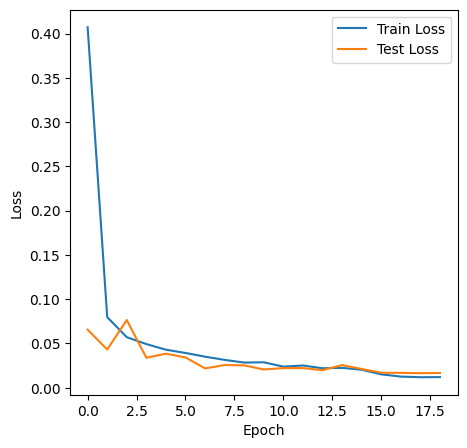

In [17]:
plot_loss(train_losses, test_losses)

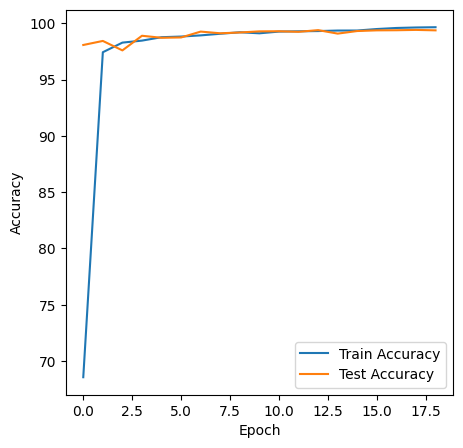

In [18]:
plot_accuracy(train_acc, test_acc)

CODE BLOCK: 11

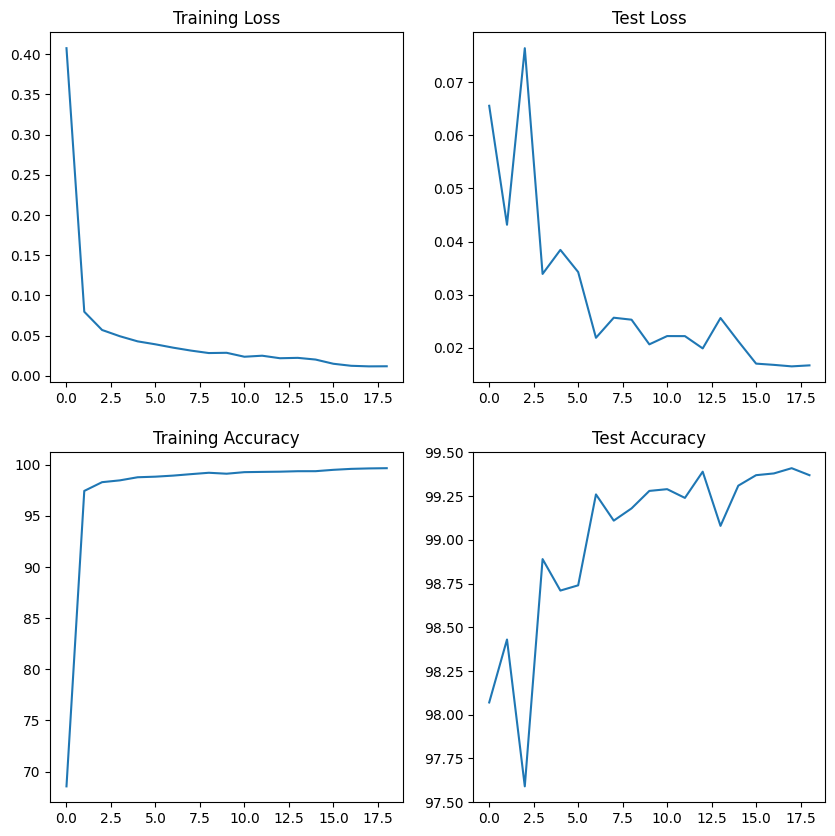

In [19]:
# Print loss and accuracy
from utils import display_loss_and_accuracies
display_loss_and_accuracies(train_losses, train_acc, test_losses, test_acc)